# Obdelava 47. vaje

## SILA MED PLOŠČAMA KONDENZATORJA

Gregor Žunič, 11.5.2020

## Uvod

Zaradi električnih privlačnih sil med nasprotnima nabojema se elektrodi kondenzatorja privlačita. To si ogledamo pri ploščatem kondenzatorju, ki ima plošči s ploščino $S$ v razmiku $d$. Kapaciteta kondenzatorja je tedaj $C = \frac{ε0S}{d}$. Pritisnimo na plošči napetost $U$. Sila $F$ med ploščama je enaka produktu naboja na prvi plošči in poljske jakosti, ki bi jo dobili samo z nabojem na drugi plošči.
$$ F = e_1 E_2 $$
pri tem je $e_1 = CU$ in $E_2 = \frac{U}{2d}$.

Z izrazom za kapaciteto sledi
$$ F = \frac{CU^2}{2d} = \frac{\epsilon_0SU^2}{2d^2} .$$

Tudi pri drugače oblikovanih elektrodah je sila sorazmerna s kvadratom napetosti. V statičnih voltmetrih izkoriščamo silo med elektrodama za merjenje napetosti.

## Naloga

Izmeri silo med ploščama danega kondenzatorja v odvisnosti od napetosti in določi električno konstanto!

## Obdelava in rezultati

In [2]:
from scipy.optimize import curve_fit
import scipy.constants as const
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import display, Image, IFrame
from negotovost import Negotovost

In [22]:
podatki = pd.read_csv('podatki.csv', comment='#')
print('m [kg], U[V]')

m [kg], U[V]


In [23]:
podatki['U'] = (podatki['U1']+podatki['U2']+podatki['U3'])/3
podatki['m'] = podatki['m']/1000
display(podatki)

,m,U1,U2,U3,U
0,0.0001,310,340,310,320.000000
1,0.0003,730,680,780,730.000000
2,0.0005,790,960,970,906.666667
3,0.0007,1320,1260,1340,1306.666667
4,0.0009,1190,1260,1340,1263.333333
5,0.0011,1740,1450,1520,1570.000000
6,0.0013,1650,1490,1550,1563.333333
7,0.0015,1860,1740,1840,1813.333333
8,0.0017,1810,1820,1710,1780.000000


In [7]:
def fit_func(x, a, b):
    return x*a+b

In [10]:
x = podatki['m']
y = podatki['U']**2

params = curve_fit(fit_func, x, y)
a,b = params[0]

# CALCULATE ERRORS FROM MATRIX
errs = np.sqrt(np.diag(params[1]))
print('a =', a,'V^2/kg','+-',errs[0],'V^2/kg', '\nb =', b,'+-',errs[1])

k = (a,errs[0])

a = 2044274064.1872363 V^2/kg +- 155775589.13272265 V^2/kg 
b = -48044.1851551852 +- 161636.70800737425


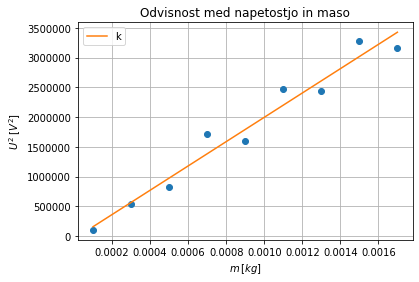

In [19]:
y_fit = fit_func(x, a, b)

plt.plot(x, y, 'o')
plt.plot(x, y_fit, label=r'k')

plt.title(r'Odvisnost med napetostjo in maso')
plt.ylabel(r'$ U^2 \; [V^2] $')
plt.xlabel(r'$m \: [kg]$')

plt.grid()
plt.legend()
plt.show()

Koeficient na grafu je $ k = (2.04 \pm 0.16) \cdot 10^{9} \: \frac{V^2}{kg}$

Sedaj lahko enačbe obrnemo:

$$ F = \frac{\epsilon_0SU^2}{2d^2} $$

$$ \epsilon_0 = \frac{F2d^2}{SU^2} $$

$$ \epsilon_0 = \frac{2d^2 g}{\pi r^2 k} $$

In [20]:
d = (0.0051,0.0001) #m
r = (0.19/2,0.001) #m

data = [
    ('k',k[0],k[1],'V^2/m'),
    ('d',d[0],d[1],'m'),
    ('r',r[0],r[1],'m'),
    ('g',const.g,0.01,'N/kg')
    ]

function = '2*d^2*g/(pi*r^2*k)'

negotovost = Negotovost(data,function,floating_points=3)
negotovost.draw_table(units=r'F/m',text_size=16,variable='\epsilon_0')

<IPython.core.display.Latex object>

,$\frac{\partial \epsilon_0}{\partial x_i}$,$\sigma_i$,$\sigma_i \cdot \frac{\partial \epsilon_0}{\partial x_i} $
$k$,$- \frac{2 d^{2} g}{\pi k^{2} r^{2}}$,$1.558E08\; V^2/m$,$-6.707E-13\;F/m$
$d$,$\frac{4 d g}{\pi k r^{2}}$,$1.000E-04\; m$,$3.452E-13\;F/m$
$r$,$- \frac{4 d^{2} g}{\pi k r^{3}}$,$1.000E-03\; m$,$-1.853E-13\;F/m$
$g$,$\frac{2 d^{2}}{\pi k r^{2}}$,$1.000E-02\; N/kg$,$8.975E-15\;F/m$


<IPython.core.display.Latex object>

Izračunana konstanta iz podatkov je
$$ \epsilon_0 = (8.80 \pm 0.78) \cdot 10^{-12} \: \frac{F}{m} $$

To je zelo blizu električni konstanti. To razliko bi lahko mogoče celo pripisali, da je drugačna zaradi medija, vendar je bolj verjetna zgolj merska napaka.

In [15]:
print(const.epsilon_0)

8.854187817620389e-12


In [21]:
d = np.sqrt( const.epsilon_0 * np.pi * r[0]**2 * k[0] /(2*const.g))
print(d,'m')

0.005115253137858021 m


Razdalja izračunana v obratno smer je skoraj enaka.